## MobileNet model evaluation
 
 Training and validation sets: Frame-based RAFT MIM12

Test set: Patch-based medium RAFT-MIM12

Test set: Patch-based small RAFT-MIM12

In [1]:
import time
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.preprocessing import image
from os import listdir
from os.path import isfile, join
import seaborn as sns 
from tensorflow.keras.models import load_model




### Model Evaluation

Test set: Patch-based medium RAFT-MIM12


In [2]:
test_data_dir = '../test-sets/patch-based-medium-RAFT-MIM12-test/all/'
img_rows, img_cols = 224,224
test_datagen = ImageDataGenerator()
 

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows, img_cols),
        class_mode='binary')
   
# Fetching x_test, y_test variables from test.    
test_generator.reset()
x_test, y_test = next(test_generator)
for i in range(len(test_generator)-1): 
    img, label = next(test_generator)
    x_test = np.append(x_test, img, axis=0 )
    y_test = np.append(y_test, label, axis=0)
    

nb_test_samples = len(x_test) 
    
 
    


Found 306 images belonging to 2 classes.


**********************Classification Report ******************
              precision    recall  f1-score   support

         0.0       0.96      0.43      0.60       150
         1.0       0.64      0.98      0.78       156

    accuracy                           0.71       306
   macro avg       0.80      0.71      0.69       306
weighted avg       0.80      0.71      0.69       306


**************************Confusion Matrix********************


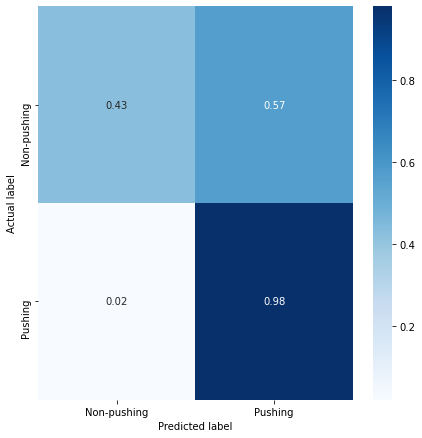

<Figure size 432x432 with 0 Axes>

In [3]:
model= load_model('../CNN-based-classifiers/MobileNet-frames-12-RAFT.h5')
test_generator.reset()

classes=["Non-pushing","Pushing"]
y_pred=model.predict(x_test)
Y_pred=(np.round(y_pred))



# Precision=TP/(TP+FP)
# Recall=TP/(TP+FN)
# f1-score  metric combines precision and recall   

print ("**********************Classification Report ******************") 
print(classification_report(y_test, Y_pred))
print()

print ("**************************Confusion Matrix********************")
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=Y_pred).numpy()

con_mat_norm_per = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)


con_mat_df_per = pd.DataFrame(con_mat_norm_per,
                     index = classes, 
                     columns = classes)


 
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df_per, annot=True,cmap=plt.cm.Blues)

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

figure = plt.figure(figsize=(6, 6))


### Model Evaluation
Test set: Patch-based small RAFT-MIM12

In [4]:
test_data_dir = '../test-sets/patch-based-small-RAFT-MIM12-test/all/'

test_datagen = ImageDataGenerator()
 

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows, img_cols),
        class_mode='binary')
   
# Fetching x_test, y_test variables from test.    
test_generator.reset()
x_test, y_test = next(test_generator)
for i in range(len(test_generator)-1): 
    img, label = next(test_generator)
    x_test = np.append(x_test, img, axis=0 )
    y_test = np.append(y_test, label, axis=0)
    

nb_test_samples = len(x_test) 
    

Found 576 images belonging to 2 classes.


**********************Classification Report ******************
              precision    recall  f1-score   support

         0.0       0.97      0.32      0.48       360
         1.0       0.46      0.99      0.63       216

    accuracy                           0.57       576
   macro avg       0.72      0.65      0.55       576
weighted avg       0.78      0.57      0.54       576


**************************Confusion Matrix********************


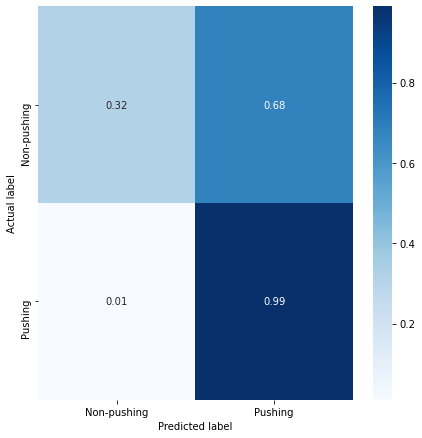

<Figure size 432x432 with 0 Axes>

In [5]:
test_generator.reset()

classes=["Non-pushing","Pushing"]
y_pred=model.predict(x_test)
Y_pred=(np.round(y_pred))



# Precision=TP/(TP+FP)
# Recall=TP/(TP+FN)
# f1-score  metric combines precision and recall   

print ("**********************Classification Report ******************") 
print(classification_report(y_test, Y_pred))
print()

print ("**************************Confusion Matrix********************")
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=Y_pred).numpy()

con_mat_norm_per = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)


con_mat_df_per = pd.DataFrame(con_mat_norm_per,
                     index = classes, 
                     columns = classes)


 
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df_per, annot=True,cmap=plt.cm.Blues)

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

figure = plt.figure(figsize=(6, 6))
